# Analysis of the moodplay distances

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

Let's load the moodplay dataset first

In [2]:
path = "/Users/harnooroberai/Data_Science/DigitalMediaSocalNetwork/PROJECT/Specific Idea 2 Network Science and Music - Moodplay Dataset (Updated 10 April added graphs  generat/graphs_mood/moodfeatures.csv"
moodplay_dataset = pd.read_csv(path, sep=",")
filter1 = np.array(["song","arousal","valence","dominance"])  
selected_data=moodplay_dataset.loc[:,filter1]
adna=selected_data.dropna(axis=1)
df = pd.DataFrame(adna)
print(df.head())
df.shape

                                  song   arousal   valence  dominance
0                  JudgeDread-BigSeven -0.746238 -0.262107  -0.302248
1        WillieWilliams-ArmagideonTime -0.885024 -0.435744   0.766729
2              KrisKristofferson-WhyMe -0.959188 -0.584947   0.932921
3           GramParsons-CryOneMoreTime -0.791149 -0.554706   0.370833
4  HankWilliams-MySweetLoveAin'tAround -0.887018 -0.207455  -0.167268


(389, 4)

Then let's load the communities csv from gephi

Note: You have to run the modularity statistic before exporting the table

(To export the CSV file from gephi go to Data Laboratory -> Export Table)

In [3]:
gephi_csv_path = "/Users/harnooroberai/Data_Science/DigitalMediaSocalNetwork/PROJECT/HD/GEPHI HD Analysis/HD_70.csv"
communities_dataset = pd.read_csv(gephi_csv_path, sep=",")
filter2 = np.array(["Id","modularity_class"])  
selected_data_gephi=communities_dataset.loc[:,filter2]
adna2=selected_data_gephi.dropna(axis=1)
gephi_df = pd.DataFrame(adna2)
gephi_df.columns = ['song','modularity_class']
gephi_df.head()

,song,modularity_class
0,JudgeDread-BigSeven,0
1,KrisKristofferson-WhyMe,0
2,GramParsons-CryOneMoreTime,1
3,HankWilliams-MySweetLoveAin'tAround,1
4,TheKing'sSingers-Can'tBuyMeLove,0


Let's have a look at the column datatypes, the modularity class should be type 'int64'

In [4]:
gephi_df.dtypes

song                object
modularity_class     int64
dtype: object

Store each id in a different dataframe where the modularity class is the key

In [5]:
available_classes = list(gephi_df.modularity_class.unique())
available_classes.sort()

classes_dict = {}

for modularity_class in available_classes:
    class_name = str("class_{}".format(modularity_class))
    classes_dict[class_name] = gephi_df.loc[gephi_df['modularity_class'] == int(modularity_class)]
    print(classes_dict[class_name].head())
    print(classes_dict[class_name].shape)

                                      song  modularity_class
0                      JudgeDread-BigSeven                 0
1                  KrisKristofferson-WhyMe                 0
4          TheKing'sSingers-Can'tBuyMeLove                 0
5  CharlieRich-LifeHasItsLittleUpsAndDowns                 0
8  MerleHaggard-It'sNotLove(ButIt'sNotBad)                 0
(140, 2)
                                   song  modularity_class
2            GramParsons-CryOneMoreTime                 1
3   HankWilliams-MySweetLoveAin'tAround                 1
9                    TheHouseOfLove-Ray                 1
15       RayPrice-HeartachesByTheNumber                 1
16                  JohnCale-GhostStory                 1
(132, 2)
                                            song  modularity_class
6                           RosanneCash-TheWheel                 2
7                 JohnGorka-WhereTheBottlesBreak                 2
11                   Ol'DirtyBastard-Gettin'High                 2


Do an inner join to merge the tables, this way we get the arousal, valence and dominance values for the songs in one particular community

In [6]:
class_df_dict = {}

for class_number, values in classes_dict.items():
    class_df_dict[class_number] = pd.merge(df, values, on='song', how='inner')
    print(class_df_dict[class_number].head())
    print(class_df_dict[class_number].shape)


                             song   arousal   valence  dominance  \
0            RosanneCash-TheWheel -1.129287 -0.511057  -0.511048   
1  JohnGorka-WhereTheBottlesBreak -0.791149 -0.554706   0.370833   
2          MethodMan-PerfectWorld -0.906140 -0.253969   0.197257   
3     Ol'DirtyBastard-Gettin'High -0.925306 -0.276050   0.136423   
4        ShannonNoll-NewBeginning -0.737156 -0.343185   0.295392   

   modularity_class  
0                 2  
1                 2  
2                 2  
3                 2  
4                 2  
(86, 5)
                                   song   arousal   valence  dominance  \
0                 ThePriests-Benedictus -0.902935 -0.363039   0.874369   
1  Innerpartysystem-WhatWeWillNeverKnow -0.730102 -0.250260   0.347161   
2                    Jazztronik-Phoenix -0.906140 -0.253969   0.197257   
3                        Flobots-Combat -0.881362 -0.253361  -0.446208   
4                     Akasha-JazzGarage  0.540014  0.771785  -0.280235   

   mod

Plot the different values for the communities

In [7]:
mpl.rcParams['figure.figsize'] = (20, 10)
mpl.rcParams['axes.grid'] = False 

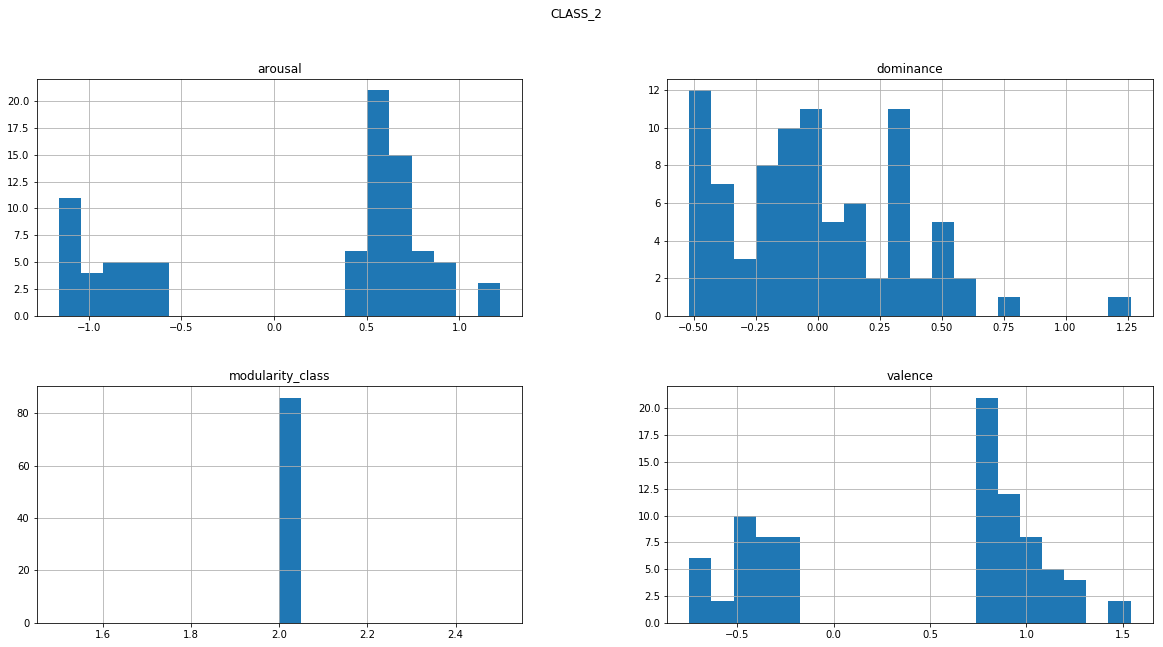

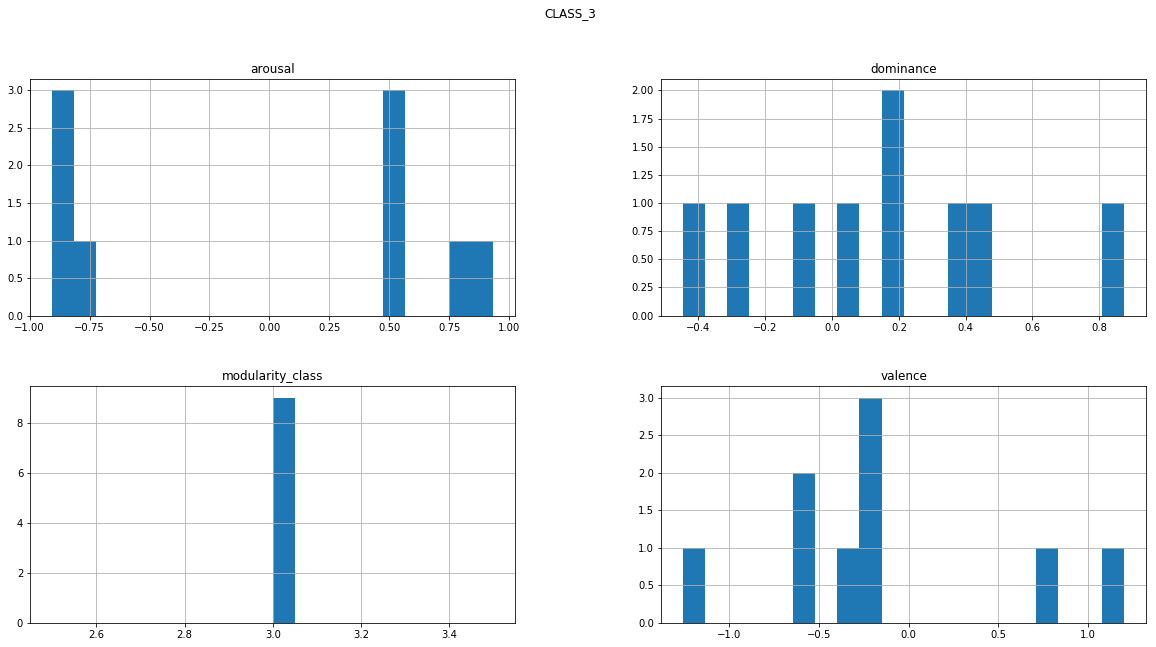

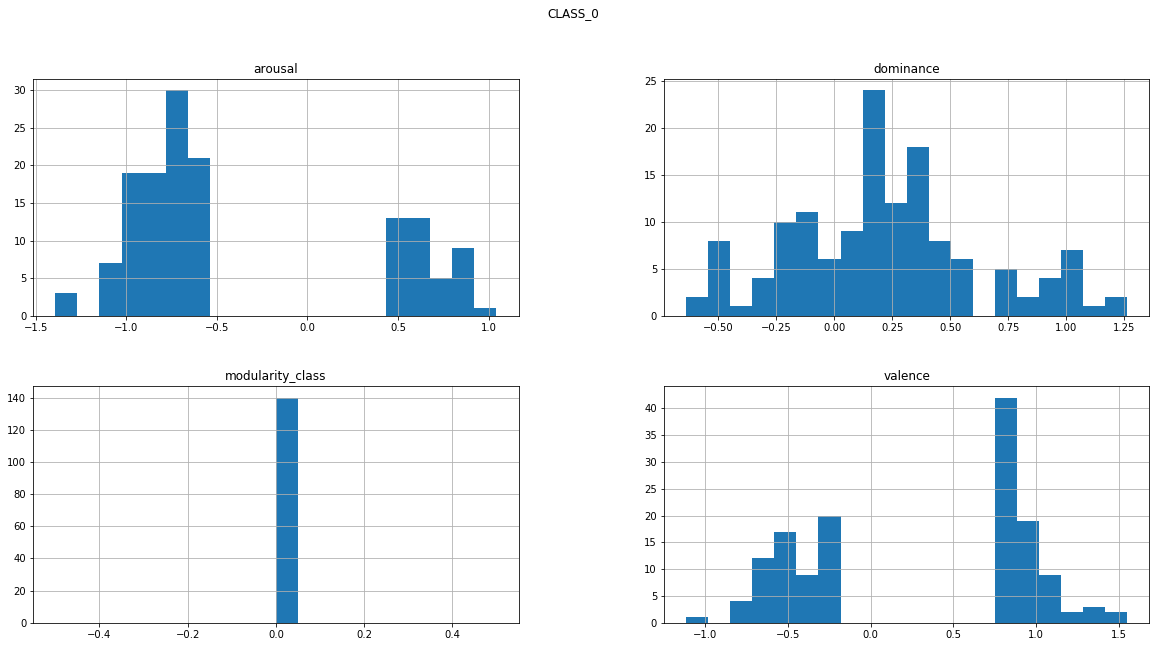

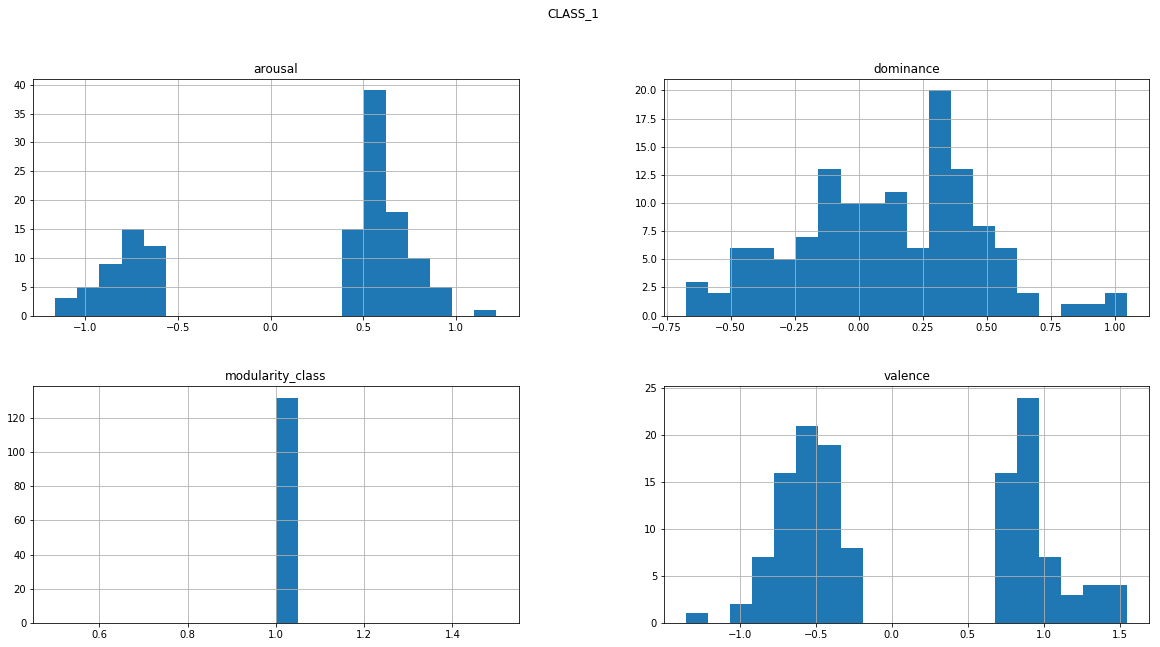

In [8]:
#Note: If the csv file contains many communities (+20) this will not work due to memory consumption
for key in class_df_dict.keys():
    hist_plot = class_df_dict[key].hist(bins=20, alpha=1)
    plt.suptitle("{}".format(str(key).upper()))


In [9]:
type(class_df_dict["class_0"])
class_df_dict["class_0"].to_csv('test', sep='\t')

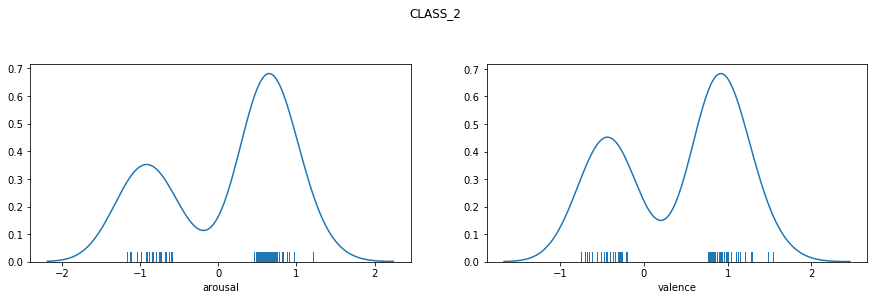

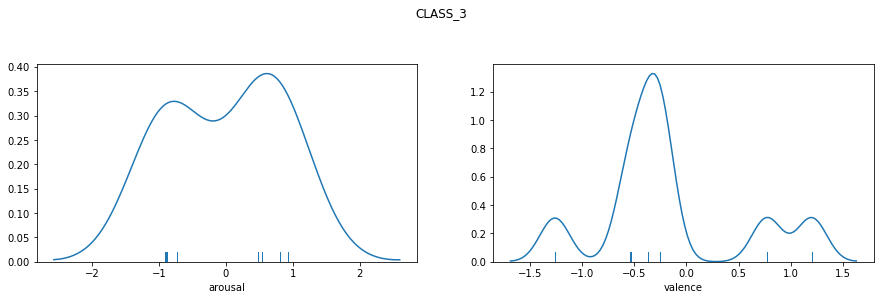

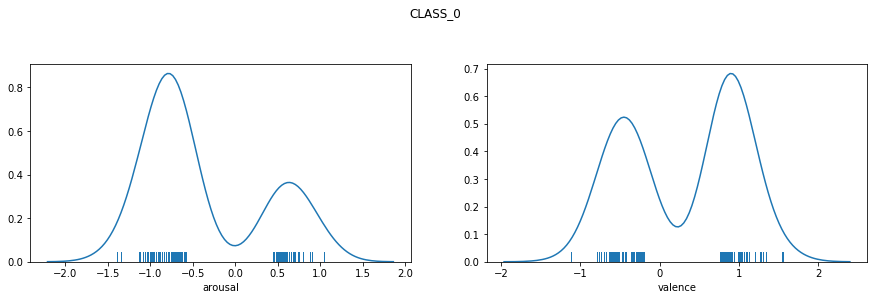

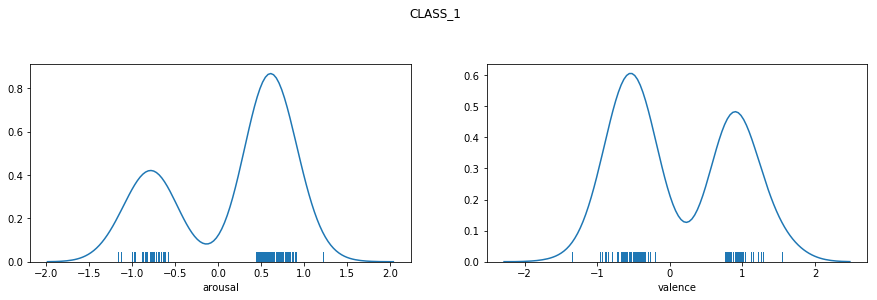

In [13]:
import seaborn as sns
# mpl.rcParams['figure.figsize'] = (15, 8)
# mpl.rcParams['axes.grid'] = False

for key in class_df_dict.keys():
    fig = plt.figure()
#     fig.subplots_adjust(hspace=0.9, wspace=0.9)
    ax = fig.add_subplot(2, 2, 1)
    plt.suptitle("{}".format(str(key).upper()))
    sns.distplot(class_df_dict[key]['arousal'], hist=False, rug=True)
    ax = fig.add_subplot(2, 2, 2)
    sns.distplot(class_df_dict[key]['valence'], hist=False, rug=True)
    plt.show()